# Extract MG setup timings 
Using tunechache files
June 27, 2023

In [1]:
import os, glob
import subprocess as sp
import numpy as np
import shutil

import re

import pandas as pd

import matplotlib.pyplot as plt
from ipywidgets import *

import itertools

In [2]:
def f_get_data(fname): 

    cmd="grep 'computeUV\|computeVUV\|computeLV\|computeVLV\|computeKV' %s"%(fname)
    op=sp.check_output(cmd,shell=True,text=True)

    df_data=pd.DataFrame([])
    cols=['vol', 'order', 'Ns', 'Nc', 'tile_size', 'dim', 'dir', 'nFace', 'time']
    
    # print(op)
    
    arr=op.split('\n')
    # print(arr)
    dict1={}
    
    # return arr[0]

    for i in arr:
        a1=i.split(',')
        a2=a1[1:-3]
        for j in a2:
            if len(j.split('='))>1:
                key,val=j.split('=')
                dict1[key]=val

        dict1['time']=a1[-1].split('tuning took ')[-1].split(' seconds')[0]


        df_data=pd.concat([df_data,pd.DataFrame(dict1,index=[df_data.shape[0]+1])])


    df_data['time']=pd.to_numeric(df_data['time'])
    
    return df_data[cols]
    # return df_data


In [3]:
# top_dir='\~/mg_output_files/mg_profile_files/'
top_dir='/autofs/nccs-svm1_home1/venkitesh/mg_output_files/mg_profile_files/'
flist=glob.glob(top_dir+'profile_*.tsv')
data_dict={}
for fname in flist:
    print(fname)
    key=fname.split('/')[-1].split('0_')[-1].split('.tsv')[0]
    data_dict[key] = f_get_data(fname)

/autofs/nccs-svm1_home1/venkitesh/mg_output_files/mg_profile_files/profile_0_192_summit.tsv
/autofs/nccs-svm1_home1/venkitesh/mg_output_files/mg_profile_files/profile_0_144_summit.tsv
/autofs/nccs-svm1_home1/venkitesh/mg_output_files/mg_profile_files/profile_64_0_144_crusher.tsv
/autofs/nccs-svm1_home1/venkitesh/mg_output_files/mg_profile_files/profile_64_0_192_frontier.tsv
/autofs/nccs-svm1_home1/venkitesh/mg_output_files/mg_profile_files/profile_64_0_144_frontier.tsv


In [4]:

def f_plot(data_dict,run_list):
    
    plt.figure()
    
    for run,marker in zip(run_list,itertools.cycle('o*>^sDHPdpx_')): 
        
        df=data_dict[run]
        y=df.time.values
        plt.plot(y,marker=marker,label=run)

    plt.legend()
    plt.xlabel('file line count')
    plt.ylabel('Time taken')


In [5]:
print(data_dict.keys())
# df=data_dict['192_frontier']

dict_keys(['192_summit', '144_summit', '144_crusher', '192_frontier', '144_frontier'])


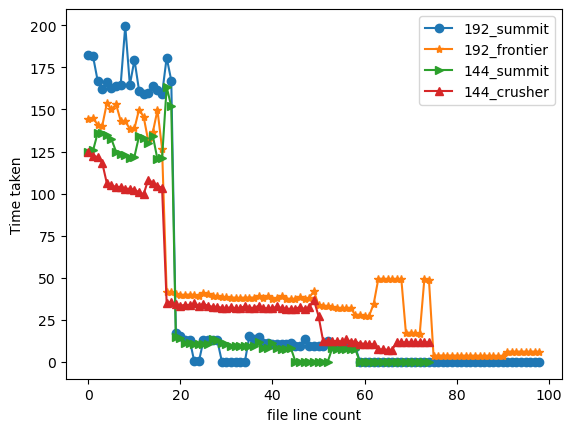

In [6]:
f_plot(data_dict,['192_summit','192_frontier','144_summit','144_crusher'])

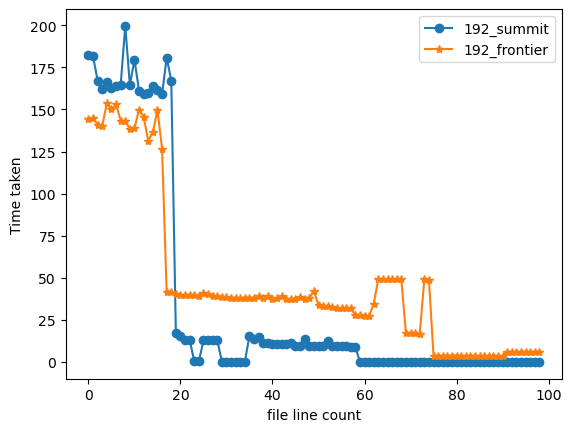

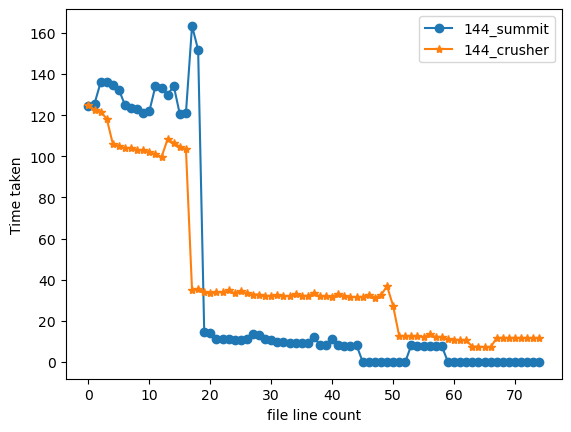

In [7]:
f_plot(data_dict,['192_summit','192_frontier'])
f_plot(data_dict,['144_summit','144_crusher'])